In [22]:
import torch
from torch import nn
import helper
import matplotlib.pyplot as plt
from torch import optim

In [23]:
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


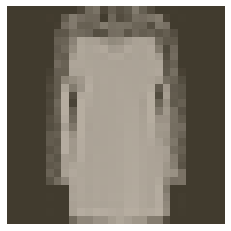

In [57]:
image,label = next(iter(trainloader))
print(image.shape)
print(labels.shape)
helper.imshow(image[0,:]);

In [61]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim =1))
criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.003)
epoch = 10
images,labels = next(iter(trainloader))
for i in range (epoch):
    running_loss=0
    for images,labels in trainloader:
        #flatten the image
        images=images.view(images.shape[0],-1)
        optimizer.zero_grad()
        #forward 
        logos = model(images)
       
        loss = criterion(logos,labels)
        
        
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print(running_loss/len(testloader))

13.006730857928087
7.7043005417866315
4.7888991762498385
4.0597460598323
3.6921902477361592
3.44557079141307
3.258909059178298
3.115847905160515
3.001113906407812
2.9106188044426546


C:\Users\lenovo\deep-learning-v2-pytorch\intro-to-pytorch\helper.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)


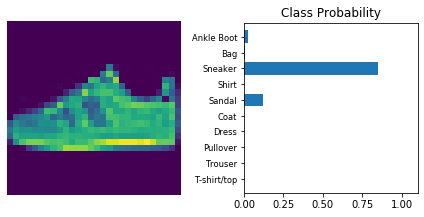

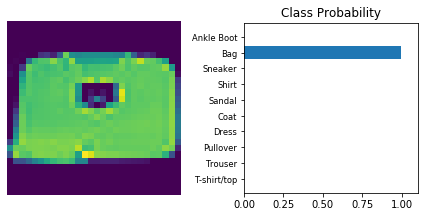

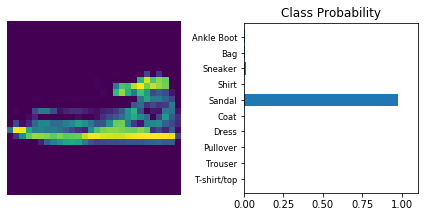

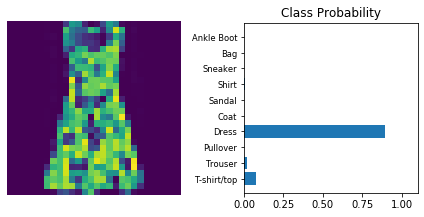

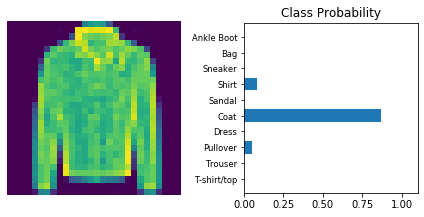

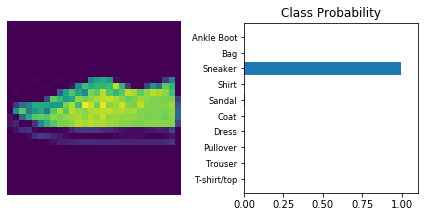

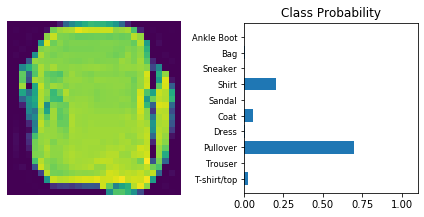

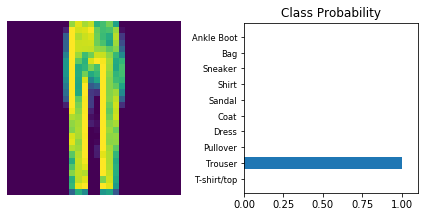

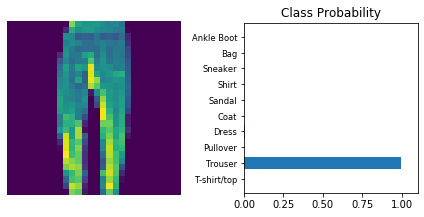

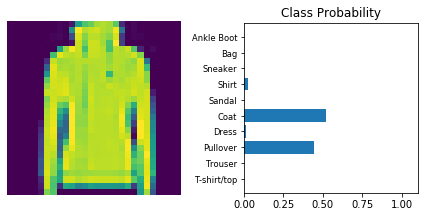

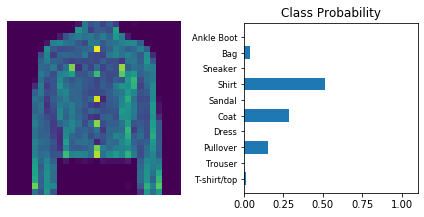

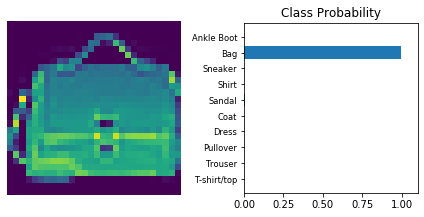

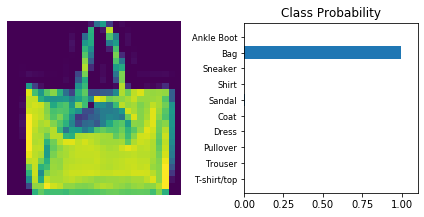

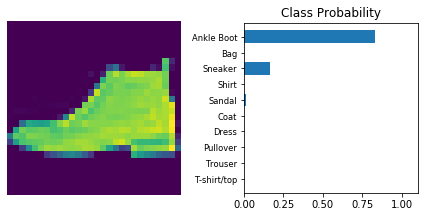

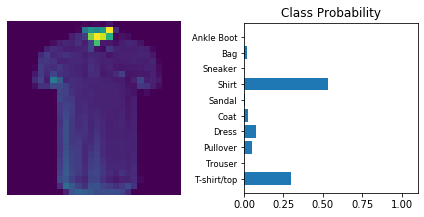

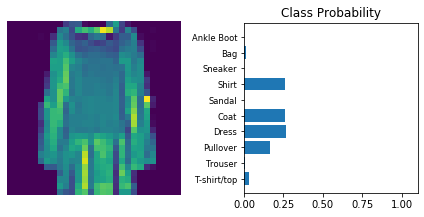

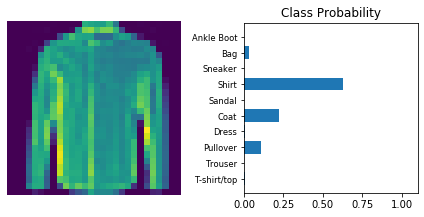

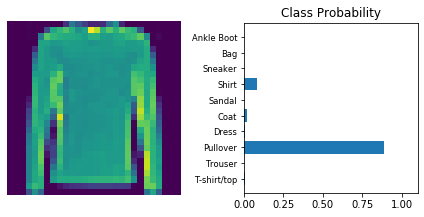

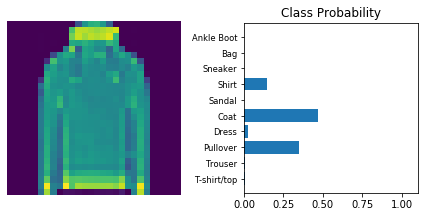

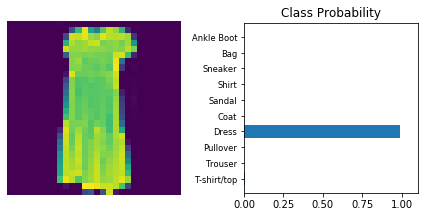

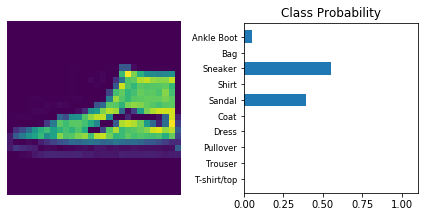

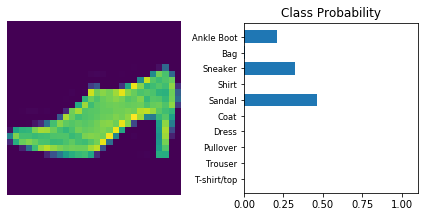

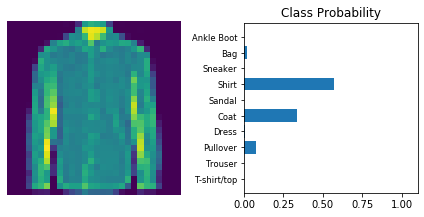

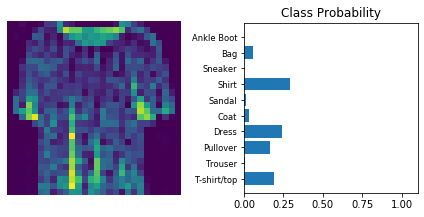

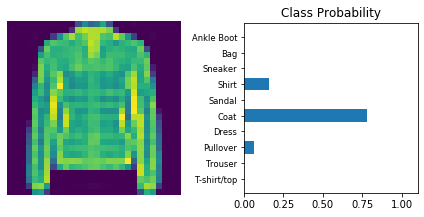

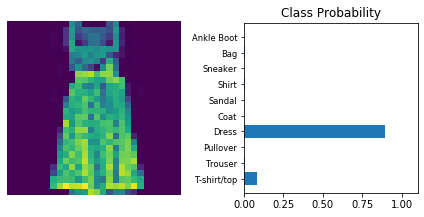

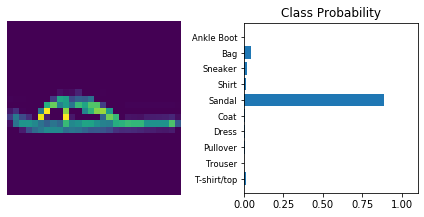

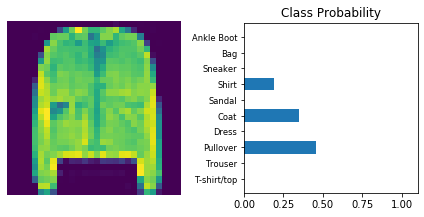

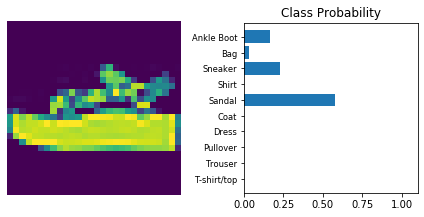

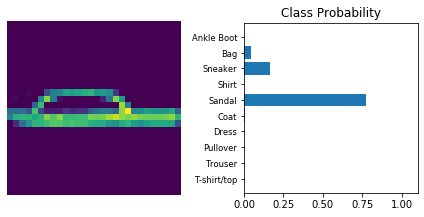

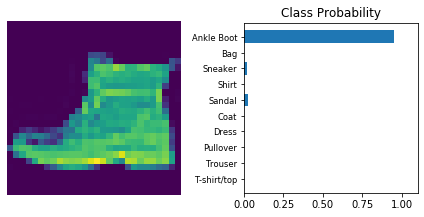

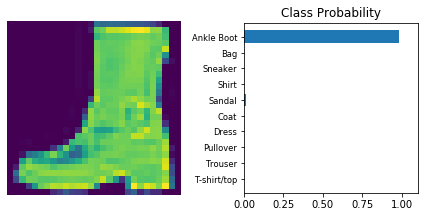

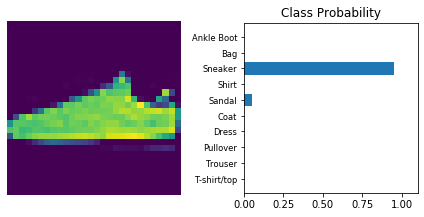

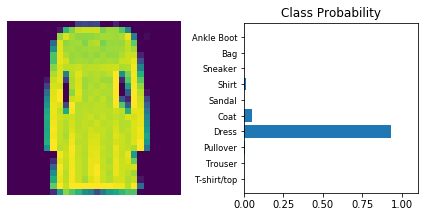

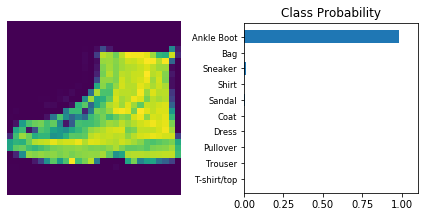

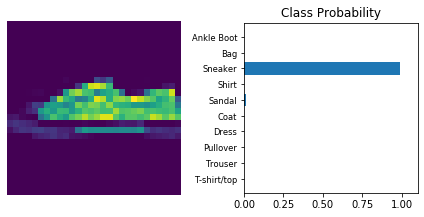

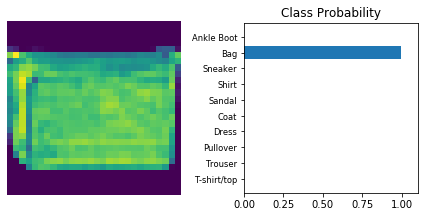

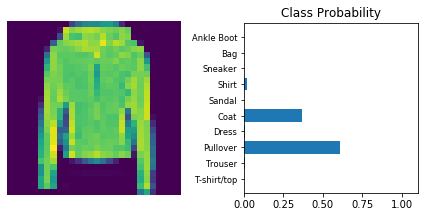

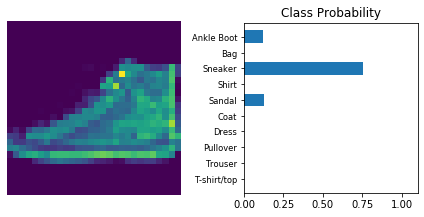

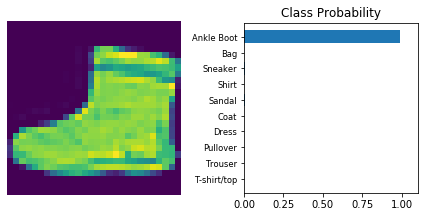

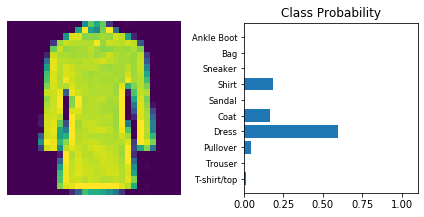

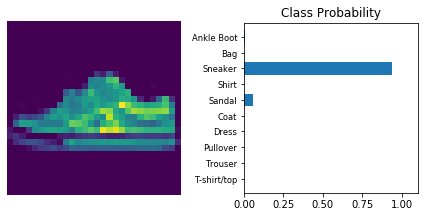

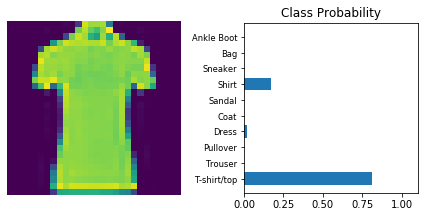

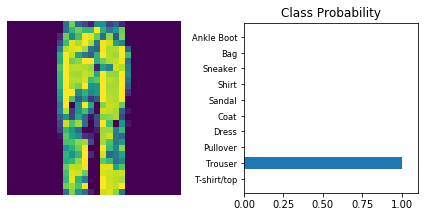

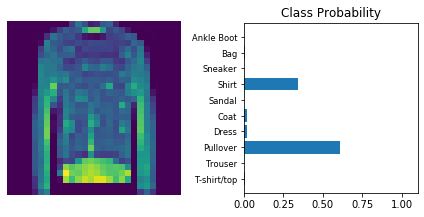

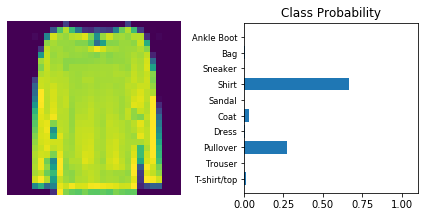

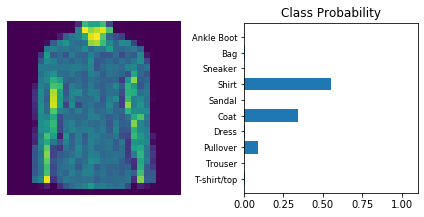

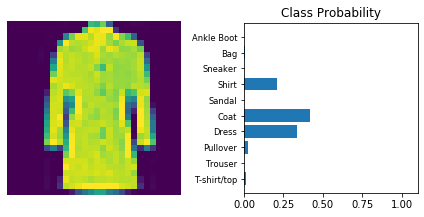

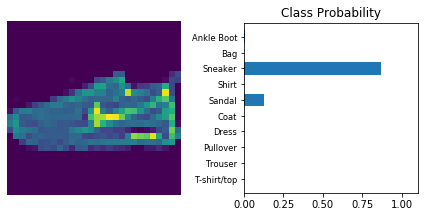

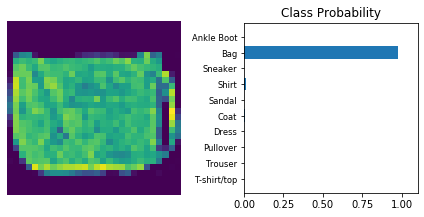

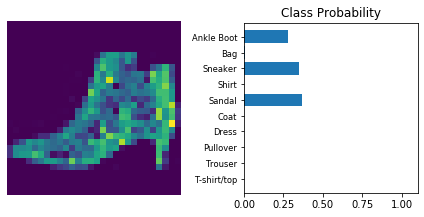

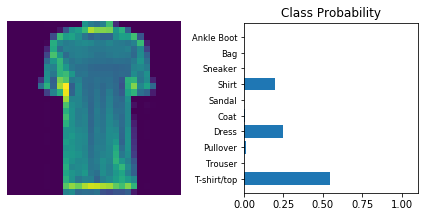

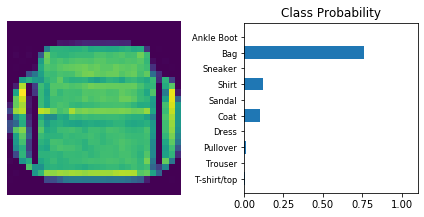

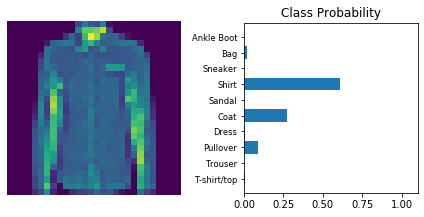

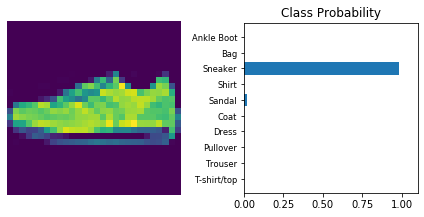

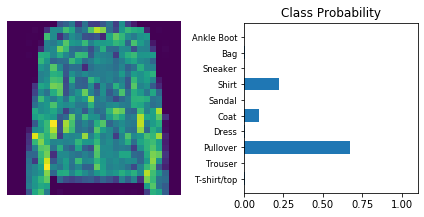

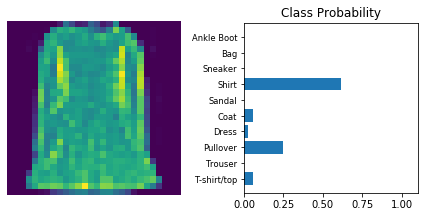

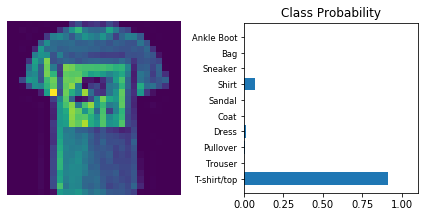

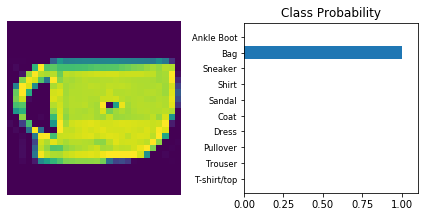

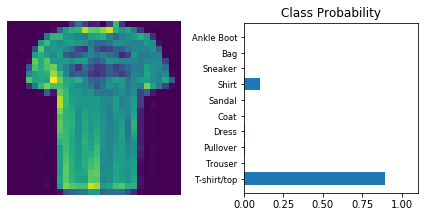

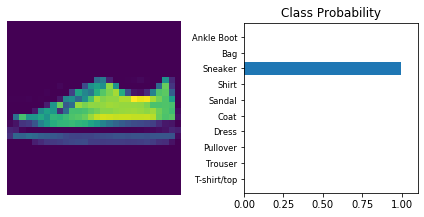

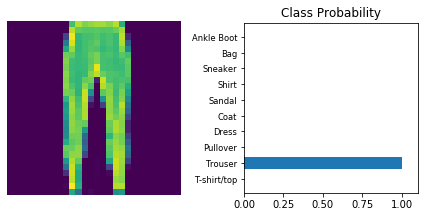

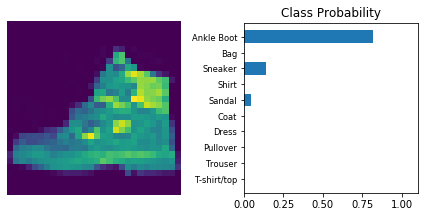

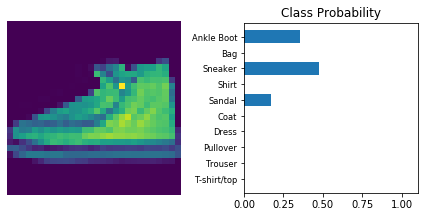

In [74]:
%matplotlib inline
import helper
i=0
while i<64:
    img = images[i].view(1,784)
    with torch.no_grad():
        logos=model(img)
    ps = torch.exp(logos)
    helper.view_classify(img.view(1,28,28),ps,version ='Fashion')
    i+=1
